In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv


**Exploring Data**

In [2]:
travel_data=pd.read_csv('/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv')

In [3]:
travel_data.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [4]:
travel_data.head()


,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [5]:
travel_data.sample(10)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
42,42,Eastern,West Bengal,Kolkata,Victoria Memorial,Museum,1921,1.5,4.6,30,Yes,Monday,Historical,Yes,0.730,Morning
33,33,Southern,Telangana,Hyderabad,Golconda Fort,Fort,1600,2.0,4.4,30,Yes,NaN,Historical,Yes,1.200,Morning
78,78,Western,Gujarat,Ahmedabad,Science City,Science,2002,7.0,4.4,500,Yes,Monday,Educational,Yes,0.110,All
150,150,Northern,Himachal Pradesh,Shimla,The Ridge,Scenic Point,Unknown,1.0,4.7,0,Yes,NaN,Recreational,Yes,0.030,Morning
204,204,Northern,Ladakh,Diskit,Diskit Monastery,Monastery,1351,1.0,4.7,20,No,NaN,Religious,No,0.015,Morning
317,317,Southern,Kerala,Kochi,LuLu International Shopping Mall,Mall,2013,3.0,4.6,0,Yes,NaN,Shopping,Yes,1.900,All
21,21,Western,Maharastra,Mumbai,Mahalaxmi Temple,Temple,1831,1.0,4.7,0,Yes,NaN,Religious,No,0.330,All
177,177,Northern,Uttarakhand,Jim Corbett,Jim Corbett National Park,National Park,1936,3.0,4.4,100,Yes,NaN,Wildlife,Yes,0.300,All
63,63,Southern,Goa,Goa,Miramar Beach,Beach,Unknown,1.5,4.2,0,Yes,NaN,Scenic,Yes,0.300,Evening
126,126,Western,Maharastra,Shirdi,Sai Baba Temple,Temple,1922,1.5,4.7,0,Yes,NaN,Religious,No,0.690,All


In [6]:
travel_data['Name'].value_counts()

Name
City Palace                  2
Ramanathaswamy Temple        2
Wonderla Amusement Park      2
Thiksey Monastery            2
Vivekananda Rock Memorial    1
                            ..
Kovalam Beach                1
Bekal Fort                   1
Varkala Beach                1
Kumarakom Bird Sanctuary     1
Albert Hall Museum           1
Name: count, Length: 321, dtype: int64

In [7]:
travel_data.tail()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
320,320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,No,0.18,All
321,321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,NaN,Historical,Yes,1.30,Afternoon
322,322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,Yes,0.15,All
323,323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,NaN,Historical,Yes,0.51,Morning
324,324,Northern,Rajasthan,Jaipur,Albert Hall Museum,Museum,1887,2.0,4.5,200,Yes,NaN,Historical,Yes,0.63,All


In [8]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [9]:
travel_data.describe()

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1.807692,4.486154,115.809231,0.408438
std,93.963645,0.971398,0.274580,530.859785,0.646668
min,0.000000,0.500000,1.400000,0.000000,0.010000
25%,81.000000,1.000000,4.400000,0.000000,0.059000
50%,162.000000,1.500000,4.500000,0.000000,0.170000
75%,243.000000,2.000000,4.600000,40.000000,0.500000
max,324.000000,7.000000,4.900000,7500.000000,7.400000


In [10]:
travel_data.isnull().sum()

Unnamed: 0                            0
Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

In [11]:
travel_data['Weekly Off'].value_counts()

Weekly Off
Monday     23
Friday      5
Sunday      2
Yes         1
Tuesday     1
Name: count, dtype: int64

In [12]:
travel_data['Weekly Off'].fillna('NAN', inplace=True)

/tmp/ipykernel_17/1110342184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  travel_data['Weekly Off'].fillna('NAN', inplace=True)


In [13]:
travel_data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
travel_data.isnull().sum()

Zone                                0
State                               0
City                                0
Name                                0
Type                                0
Establishment Year                  0
time needed to visit in hrs         0
Google review rating                0
Entrance Fee in INR                 0
Airport with 50km Radius            0
Weekly Off                          0
Significance                        0
DSLR Allowed                        0
Number of google review in lakhs    0
Best Time to visit                  0
dtype: int64

**Visualisation**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**1. Which is the state with most visiting places?**

<Axes: xlabel='count', ylabel='State'>

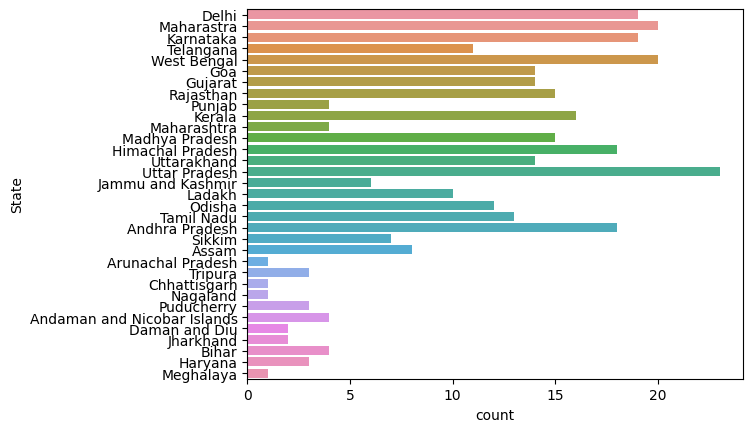

In [16]:
sns.countplot( y = 'State', data = travel_data)

**2. What are the top 5 google rated visiting place types**

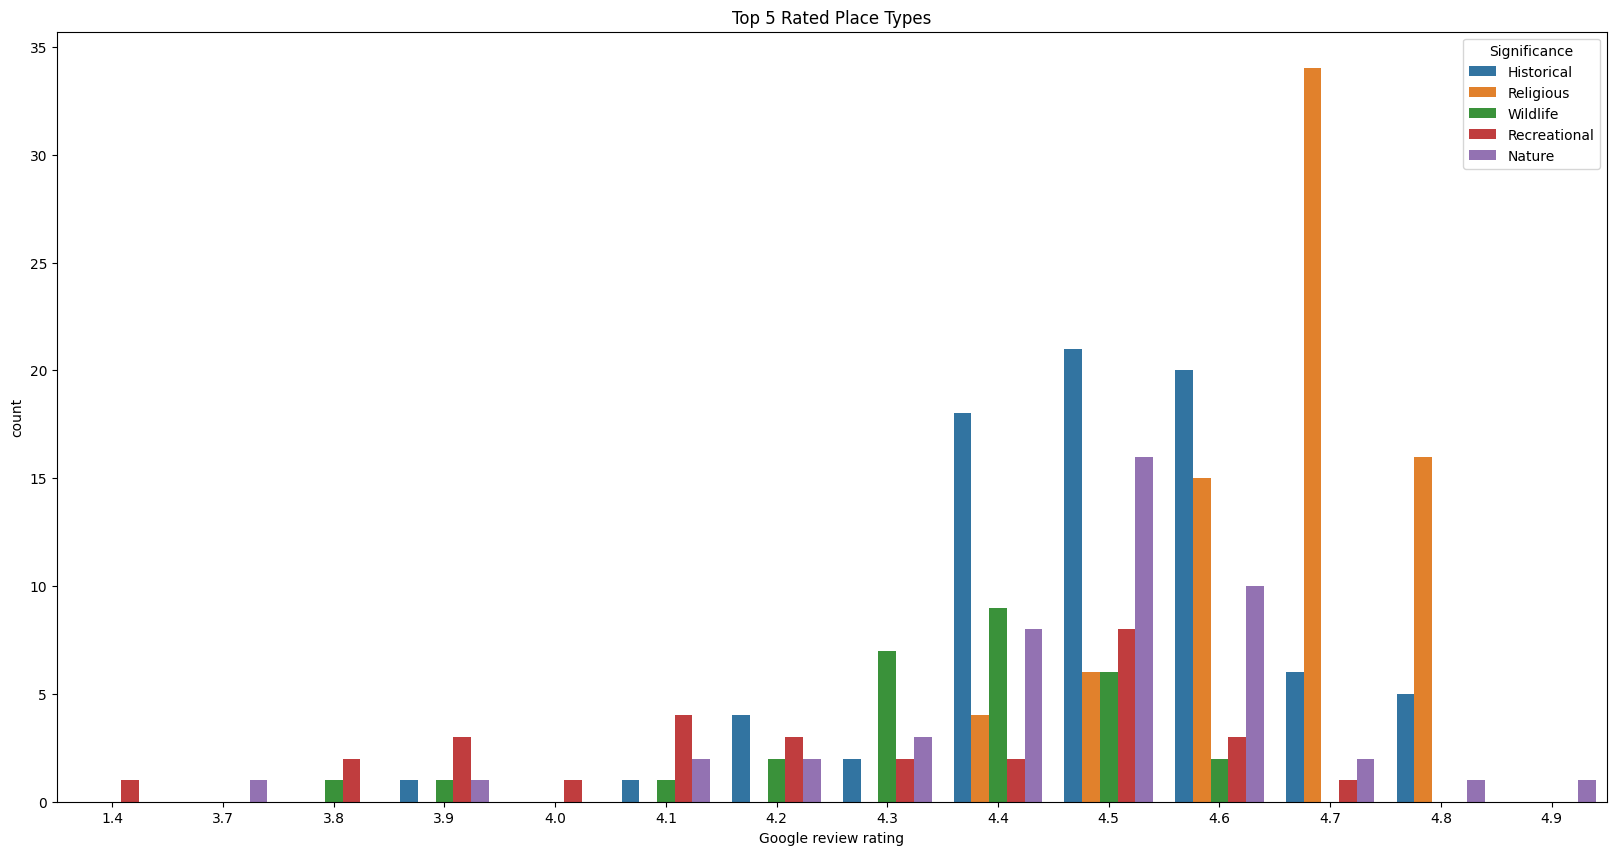

In [17]:
top_5_names = travel_data['Significance'].value_counts().head(5).index
top_5_rating_place = travel_data[travel_data['Significance'].isin(top_5_names)]

plt.figure(figsize=(20, 10))
sns.countplot(x='Google review rating', hue='Significance', data=top_5_rating_place)
plt.title('Top 5 Rated Place Types')
plt.show()

**3. What are best time to visit places?**

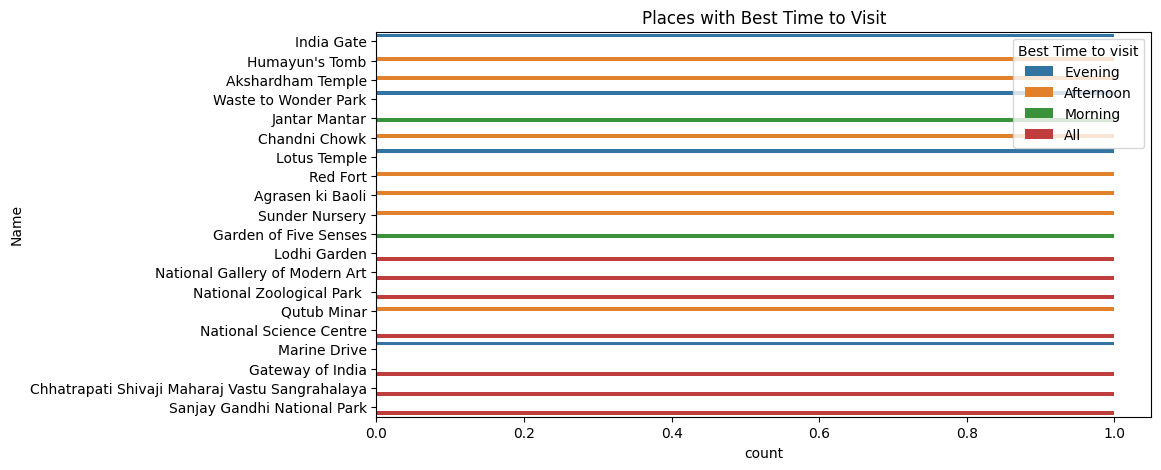

In [18]:
top_5_city = travel_data['Name'].head(20).values
top_5_city_data = travel_data[travel_data['Name'].isin(top_5_city)]

plt.figure(figsize=(10, 5))
sns.countplot(y='Name', hue='Best Time to visit', data=top_5_city_data)
plt.title('Places with Best Time to Visit')
plt.show()

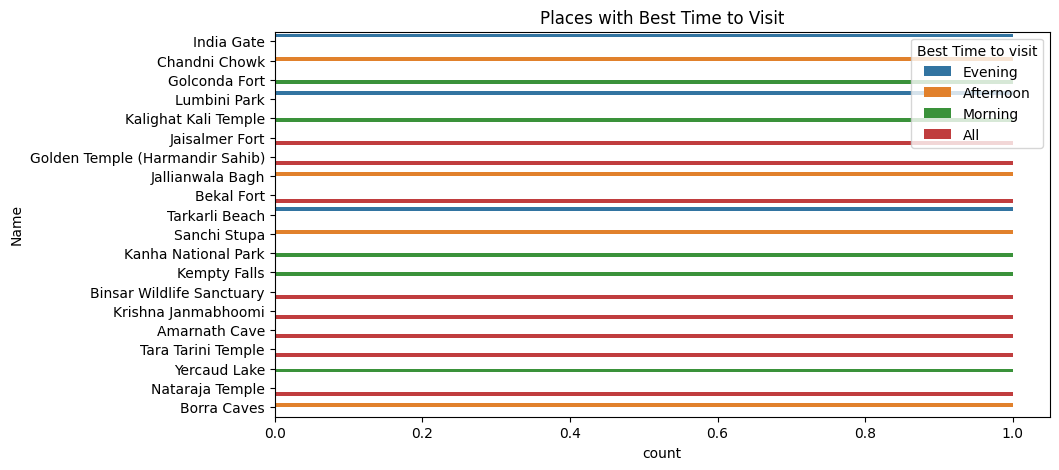

In [19]:
city_name = travel_data['Name'].sample(20).values
city_name_data = travel_data[travel_data['Name'].isin(city_name)]

plt.figure(figsize=(10, 5))
sns.countplot(y='Name', hue='Best Time to visit', data=city_name_data)
plt.title('Places with Best Time to Visit')
plt.show()

**4. What are the types of visiting places that permits DSLR?**

<Axes: xlabel='count', ylabel='Significance'>

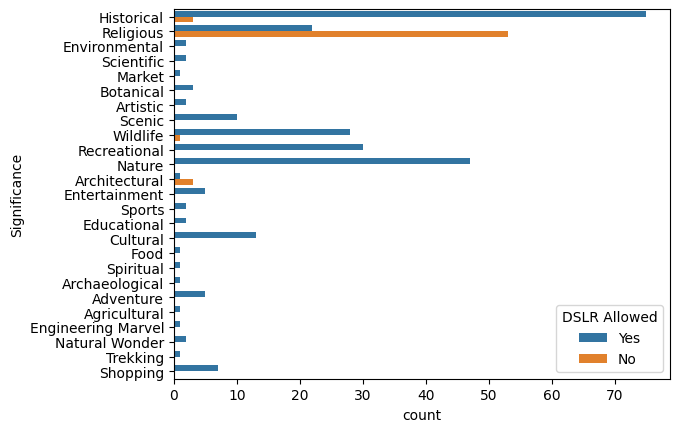

In [20]:
sns.countplot(y='Significance',hue='DSLR Allowed',data=travel_data)

**5. What is the time required to visit different types of places?**

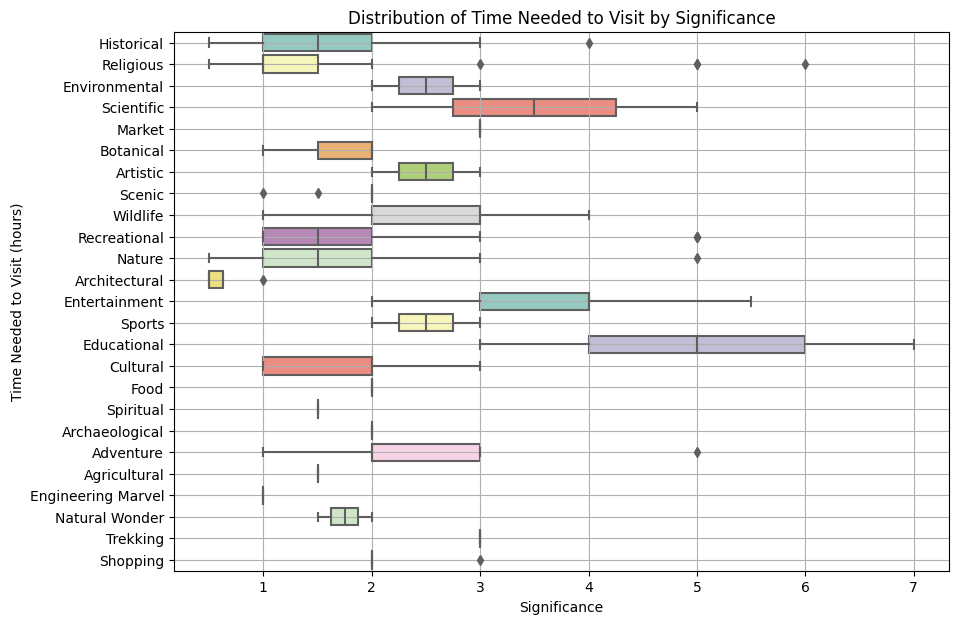

In [21]:
plt.figure(figsize=(10, 7))

# Box plot to show the distribution of 'Time Needed to Visit' by 'Significance'
sns.boxplot(x='time needed to visit in hrs', y='Significance', data=travel_data, palette='Set3')

# Additional information on the plot
plt.title('Distribution of Time Needed to Visit by Significance')
plt.xlabel('Significance')
plt.ylabel('Time Needed to Visit (hours)')
plt.grid(True)
plt.show()